In [1]:
import sys
sys.path.append('/home/karen.kang/LIGOSURF23/precession_ml')
import algo as p
import numpy as np
import pandas as pd
import corner
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib import style
import matplotlib.gridspec as gridspec
import pickle
style.use('/home/karen.kang/LIGOSURF23/plotting.mplstyle')

2024-05-04 12:48:44.819743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-04 12:48:46.880781: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-04 12:48:46.880819: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-04 12:48:47.021312: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-04 12:48:50.484890: W tensorflow/stream_executor/platform/de

In [8]:
# to load model ('lowmass', '90', '270')
p.load_and_update_model('90')

In [3]:
def plot(mapper, lam0, ndims, zoom = False):
    cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
    bbh = p.BBH(lam = lam0)
    
    fig = plt.figure(figsize=(7,6))
    if ndims == 2:
        ets = [item[0] for item in mapper.points]
        chiefs = [item[1] for item in mapper.points]
        
    elif ndims == 3: 
        ets = [item[0]/(item[0]+1)**2 for item in mapper.points]
        chiefs = [(item[0]*item[1]+ item[2])/(item[0]+1) for item in mapper.points]
    
    elif ndims == 5:
        ets = [item[0]/(item[0]+1)**2 for item in mapper.points]
        chiefs = [(item[0]*item[1]*np.cos(item[3])+ item[2]*np.cos(item[4]))/(item[0]+1) for item in mapper.points]
        
    fig = plt.figure(figsize=(7,6), constrained_layout = True)
    plt.plot(bbh.eta, bbh.chi_eff, '*', markersize= 18, color ='black',zorder = 10)
    ps = p.ParameterSpace(lam0=lam0, sample = 80000)
    sc = plt.scatter(ps.eta, ps.chi_eff, c = ps.mismatch, alpha = 0.8, cmap = cmap)
    plt.scatter(ets, chiefs, color ='#BFA89E', s = 60, edgecolors = 'white',zorder = 10)
    plt.xlabel('$\eta$', fontsize = 24)
    plt.ylabel('$\chi_{\mathrm{eff}}$', fontsize = 24)
    plt.colorbar(sc,label= '$\mathcal{MM}$',fraction=0.13, cmap = cmap)
    plt.grid(False)
    plt.xlim(0.0826,0.25)
    plt.ylim(-1,1)
    
    if zoom:
        print(min(ets), max(ets))
        print(min(chiefs), max(chiefs))
        plt.xlim(min(ets)-0.05, max(ets)+0.05)
        plt.ylim(min(chiefs)-0.02,max(chiefs)+0.02)

In [4]:
def run(lam0, ndims, percentage = 1.,stepsize = 1, N = 15000, SNR = 3):
    bbh = p.BBH(lam = lam0)
    
    if ndims == 2:
        dimensions = ['eta', "chieff"]
        start = [bbh.eta, bbh.chi_eff]
        # set nearest to true to find lambda
        mapper = p.MapDegeneracyND(lam0=lam0, start=start, dimensions=dimensions, percentage = percentage, stepsize = stepsize, sample =N, SNR = SNR)
        mapper.run_mapping_bothways()
        
        return mapper
        
    elif ndims == 3:
        dimensions = ['q', 'z1', 'z2']
        start = [bbh.q, bbh.z1,bbh.z2]
        
    elif ndims == 5:
        dimensions = ['q', 'spin1', 'spin2', 'theta1', 'theta2']
        start = [bbh.q, bbh.spin1, bbh.spin2, bbh.theta1, bbh.theta2]
    
    mapper = p.MapDegeneracyND(lam0=lam0, start=start, dimensions=dimensions, percentage = percentage, stepsize = stepsize, sample = N, SNR = SNR)
    mapper.run_mapping_bothways()
    
    return mapper

In [5]:
lam0 = [0.16, 0.1, 0, 0.5, 0.2, 0, 0.5]

# 2D

In [15]:
ndims = 2
mapper = run(lam0, ndims, N = 50000, SNR = 15)

100%|██████████| 50000/50000 [00:02<00:00, 20540.35it/s]


####################################
MAPPING FORWARD DIRECTION
1563/1563 [==============================] - 2s 1ms/step
Size after rejection sampling: 700
mapping to direction: [0.00422829 0.03054551]
currently at  [0.16, 0.5]
proposed start at  [0.16298986 0.52159894]
new start at  [0.16298986 0.52159894]
1/1 [==============================] - 0s 63ms/step
predicted mismatch from reference: 0.007585363462567329
predicted mismatch from previous: 0.007585363462567329
-----
1563/1563 [==============================] - 2s 1ms/step
Size after rejection sampling: 708
mapping to direction: [0.00429109 0.03101375]
currently at  [0.16298986 0.52159894]
proposed start at  [0.16602411 0.54352897]
new start at  [0.16602411 0.54352897]
1/1 [==============================] - 0s 70ms/step
predicted mismatch from reference: 0.009147441014647484
predicted mismatch from previous: 0.008515425026416779
-----
1563/1563 [==============================] - 2s 1ms/step
Size after rejection sampling: 664
mappi

100%|██████████| 79999/79999 [00:04<00:00, 17189.42it/s]


2500/2500 [==============================] - 4s 2ms/step


/tmp/ipykernel_1201285/257085829.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc,label= '$\mathcal{MM}$',fraction=0.13, cmap = cmap)


<Figure size 700x600 with 0 Axes>

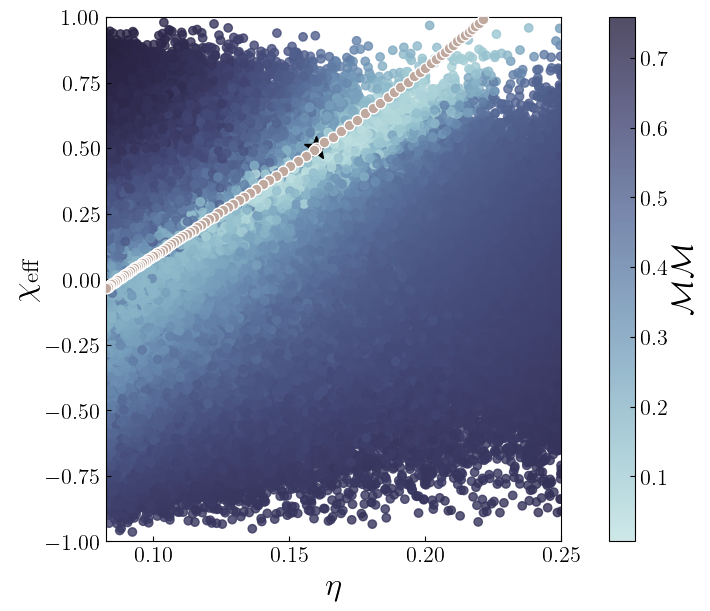

In [16]:
plot(mapper, lam0, ndims)

# 3D

In [12]:
ndims = 3
mapper2 = run(lam0, ndims, N = 50000, stepsize = 0.5, SNR = 9) 

100%|██████████| 35000/35000 [00:02<00:00, 14047.01it/s]


####################################
MAPPING FORWARD DIRECTION
1094/1094 [==============================] - 1s 1ms/step
Size after rejection sampling: 217
mapping to direction: [-0.2363529   0.23101851 -0.00926774]
currently at  [4.0, 0.5, 0.5]
proposed start at  [3.93177079 0.5666893  0.49732463]
new start at  [3.93177079 0.5666893  0.49732463]
1/1 [==============================] - 0s 70ms/step
predicted mismatch from reference: 0.06851179897785187
predicted mismatch from previous: 0.06851179897785187
-----
1094/1094 [==============================] - 1s 1ms/step
Size after rejection sampling: 174
mapping to direction: [-0.19777997  0.19491899 -0.02965456]
currently at  [3.93177079 0.5666893  0.49732463]
proposed start at  [3.87467663 0.62295756 0.4887641 ]
new start at  [3.87467663 0.62295756 0.4887641 ]
1/1 [==============================] - 0s 98ms/step
predicted mismatch from reference: 0.10899625718593597
predicted mismatch from previous: 0.04024091362953186
-----
1094/1094 [===

In [14]:
mapper2 = run(lam0, ndims, N = 10000, stepsize = 0.5, SNR = 9)

100%|██████████| 10000/10000 [00:00<00:00, 17588.83it/s]


####################################
MAPPING FORWARD DIRECTION
313/313 [==============================] - 0s 1ms/step
Size after rejection sampling: 42
mapping to direction: [-0.13599031  0.12955414  0.09849807]
currently at  [4.0, 0.5, 0.5]
proposed start at  [3.96074298 0.53739906 0.52843394]
new start at  [3.96074298 0.53739906 0.52843394]
1/1 [==============================] - 0s 79ms/step
predicted mismatch from reference: 0.0634794533252716
predicted mismatch from previous: 0.0634794533252716
-----
313/313 [==============================] - 0s 1ms/step
Size after rejection sampling: 36
mapping to direction: [-0.08413078  0.06669843  0.16096301]
currently at  [3.96074298 0.53739906 0.52843394]
proposed start at  [3.93645652 0.55665324 0.57489996]
new start at  [3.93645652 0.55665324 0.57489996]
1/1 [==============================] - 0s 103ms/step
predicted mismatch from reference: 0.10169285535812378
predicted mismatch from previous: 0.01688363589346409
-----
313/313 [============

100%|██████████| 79999/79999 [00:06<00:00, 13330.69it/s]


2500/2500 [==============================] - 4s 1ms/step


/tmp/ipykernel_3604165/257085829.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc,label= '$\mathcal{MM}$',fraction=0.13, cmap = cmap)


<Figure size 700x600 with 0 Axes>

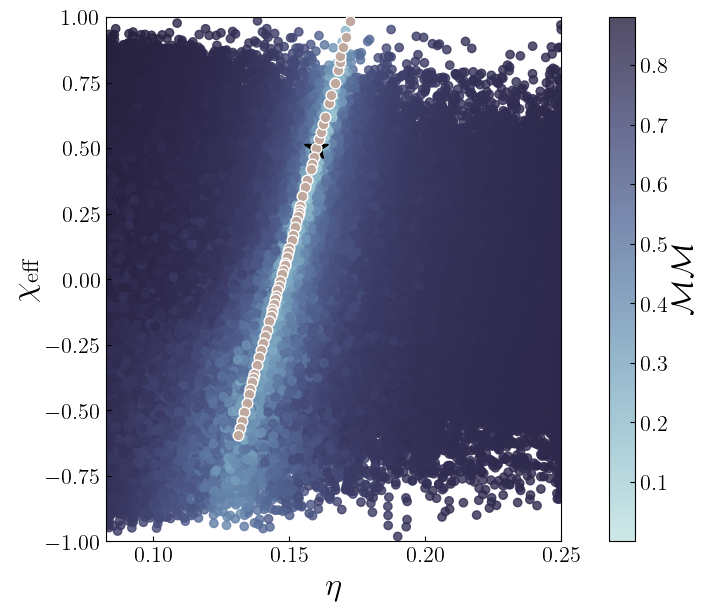

In [15]:
plot(mapper2, lam0, ndims)

100%|██████████| 79999/79999 [00:05<00:00, 15350.25it/s]


2500/2500 [==============================] - 4s 1ms/step


/tmp/ipykernel_3604165/257085829.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc,label= '$\mathcal{MM}$',fraction=0.13, cmap = cmap)


<Figure size 700x600 with 0 Axes>

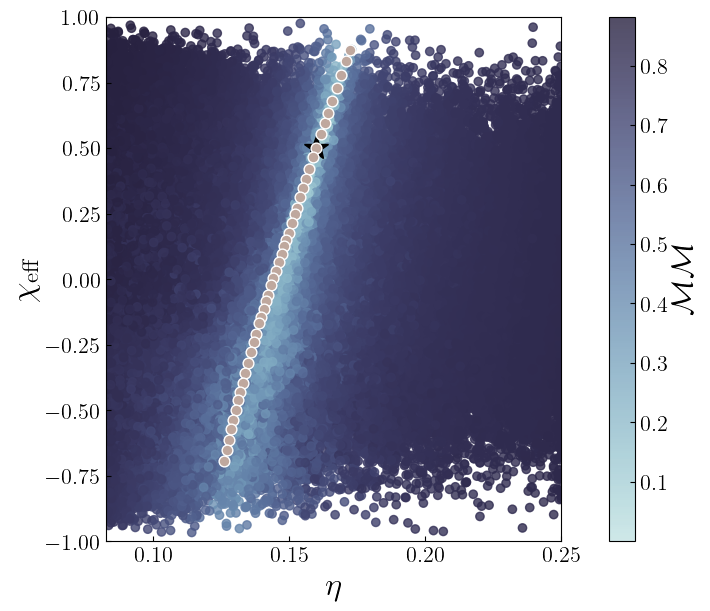

In [13]:
plot(mapper2, lam0, ndims)

# 5D

In [25]:
ndims = 5
mapper3 = run(lam0, ndims, N = 100000, SNR = 12.5, stepsize = 0.2)

100%|██████████| 100000/100000 [00:07<00:00, 14282.14it/s]


####################################
MAPPING FORWARD DIRECTION
3125/3125 [==============================] - 4s 1ms/step
Size after rejection sampling: 100
mapping to direction: [-0.02264689 -0.03519036  0.02774665 -0.01077934 -0.82073996]
currently at  [4.0, 0.5099019513592785, 0.5385164807134505, 0.197395559849881, 0.38050637711236523]
proposed start at  [3.9979744  0.50675443 0.54099822 0.19643143 0.30709716]
new start at  [3.9979744  0.50675443 0.54099822 0.19643143 0.30709716]
1/1 [==============================] - 0s 73ms/step
predicted mismatch from reference: 2.5781267311980605e-12
predicted mismatch from previous: 2.5781267311980605e-12
-----
3125/3125 [==============================] - 5s 2ms/step
Size after rejection sampling: 101
mapping to direction: [-0.00394703 -0.03108427  0.05193263 -0.09504631 -0.91010555]
currently at  [3.9979744  0.50675443 0.54099822 0.19643143 0.30709716]
proposed start at  [3.99762137 0.50397417 0.54564321 0.18793023 0.22569485]
new start at  [3.9

100%|██████████| 79999/79999 [00:05<00:00, 15156.34it/s]


2500/2500 [==============================] - 4s 1ms/step


/tmp/ipykernel_3604165/257085829.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc,label= '$\mathcal{MM}$',fraction=0.13, cmap = cmap)


<Figure size 700x600 with 0 Axes>

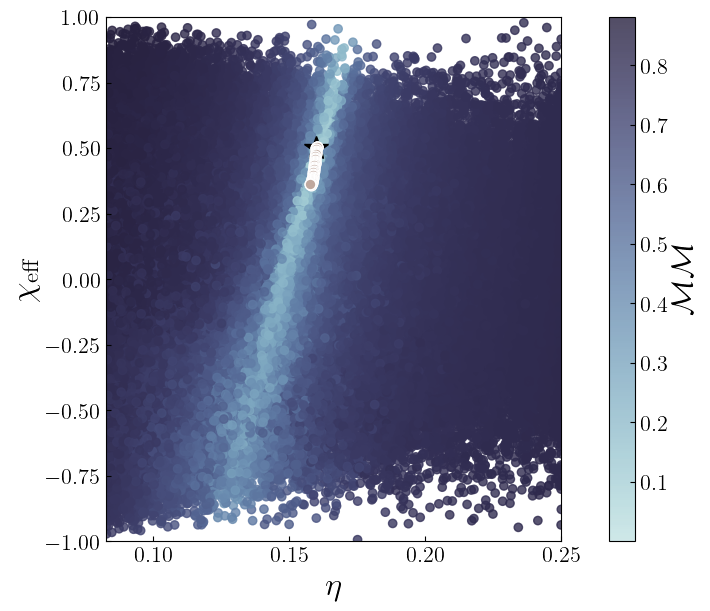

In [26]:
plot(mapper3, lam0, ndims)

100%|██████████| 79999/79999 [00:05<00:00, 15299.46it/s]


2500/2500 [==============================] - 4s 1ms/step


/tmp/ipykernel_3604165/257085829.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc,label= '$\mathcal{MM}$',fraction=0.13, cmap = cmap)


0.15768256810177728 0.16011541641984403
0.3607171624198353 0.5035167600994596


<Figure size 700x600 with 0 Axes>

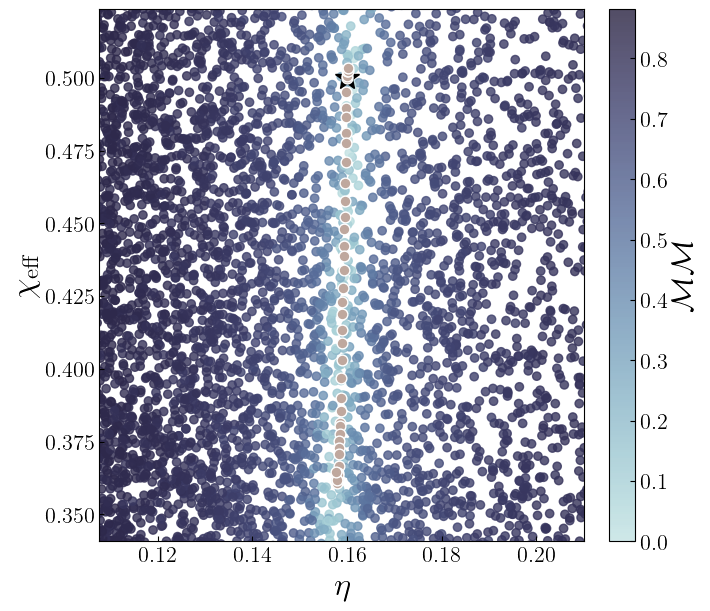

In [27]:
plot(mapper3, lam0, ndims, True)